<a href="https://colab.research.google.com/github/springboardmentor1979b-cmyk/ScoreSight---Predicting-EPL-Points-Tally-Top-Scorer/blob/Hamna-T_EPL_prediction.ipynb/Hamna_T_EPLprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path=('/content/drive/MyDrive/scoresight/dataset - 2020-09-24.csv')


In [3]:

!unzip '/content/drive/MyDrive/scoresight.zip' -d '/content/scoresight'


Archive:  /content/drive/MyDrive/scoresight.zip
  inflating: /content/scoresight/dataset - 2020-09-24.csv  


In [4]:
file_path=('/content/scoresight/dataset - 2020-09-24.csv')

In [5]:
import pandas as pd
df=pd.read_csv(file_path)
print(df)


                     Name  Jersey Number                     Club    Position  \
0              Bernd Leno            1.0                  Arsenal  Goalkeeper   
1              Matt Macey           33.0                  Arsenal  Goalkeeper   
2    Rúnar Alex Rúnarsson           13.0                  Arsenal  Goalkeeper   
3         Héctor Bellerín            2.0                  Arsenal    Defender   
4          Kieran Tierney            3.0                  Arsenal    Defender   
..                    ...            ...                      ...         ...   
566            Pedro Neto            7.0  Wolverhampton-Wanderers     Forward   
567          Raúl Jiménez            9.0  Wolverhampton-Wanderers     Forward   
568          Adama Traoré           37.0  Wolverhampton-Wanderers     Forward   
569           Fábio Silva           17.0  Wolverhampton-Wanderers     Forward   
570      Leonardo Campana           30.0  Wolverhampton-Wanderers     Forward   

    Nationality   Age  Appe

**Task 1.Check what each column represent**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

In [7]:
df.shape

(571, 59)

In [8]:
df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [9]:
df.tail()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
570,Leonardo Campana,30.0,Wolverhampton-Wanderers,Forward,Ecuador,20.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [10]:
df.describe

<bound method NDFrame.describe of                      Name  Jersey Number                     Club    Position  \
0              Bernd Leno            1.0                  Arsenal  Goalkeeper   
1              Matt Macey           33.0                  Arsenal  Goalkeeper   
2    Rúnar Alex Rúnarsson           13.0                  Arsenal  Goalkeeper   
3         Héctor Bellerín            2.0                  Arsenal    Defender   
4          Kieran Tierney            3.0                  Arsenal    Defender   
..                    ...            ...                      ...         ...   
566            Pedro Neto            7.0  Wolverhampton-Wanderers     Forward   
567          Raúl Jiménez            9.0  Wolverhampton-Wanderers     Forward   
568          Adama Traoré           37.0  Wolverhampton-Wanderers     Forward   
569           Fábio Silva           17.0  Wolverhampton-Wanderers     Forward   
570      Leonardo Campana           30.0  Wolverhampton-Wanderers     Forward   

    Nationality   Age  Appearances  Wins  Losses  Goals  ...  Punches  \
0       Germany  28.0           64    28      16      0  ...     34.0   
1       England  26.0            0     0       0      0  ...      0.0   
2       Iceland  25.0            0     0       0      0  ...      0.0   
3         Spain  25.0          160    90      37      7  ...      NaN   
4      Scotland  23.0           16     7       5      1  ...      NaN   
..          ...   ...          ...   ...     ...    ...  ...      ...   
566    Portugal  20.0           31    14       7      3  ...      NaN   
567      Mexico  29.0           78    32      23     32  ...      NaN   
568       Spain  24.0          105    27      47      5  ...      NaN   
569    Portugal  18.0            1     0       1      0  ...      NaN   
570     Ecuador  20.0            0     0       0      0  ...      NaN   

     High Claims  Catches  Sweeper clearances  Throw outs  Goal Kicks  \
0           26.0     17.0                28.0       375.0       489.0   
1            0.0      0.0                 0.0         0.0         0.0   
2            0.0      0.0                 0.0         0.0         0.0   
3            NaN      NaN                 NaN         NaN         NaN   
4            NaN      NaN                 NaN         NaN         NaN   
..           ...      ...                 ...         ...         ...   
566          NaN      NaN                 NaN         NaN         NaN   
567          NaN      NaN                 NaN         NaN         NaN   
568          NaN      NaN                 NaN         NaN         NaN   
569          NaN      NaN                 NaN         NaN         NaN   
570          NaN      NaN                 NaN         NaN         NaN   

     Yellow cards  Red cards Fouls  Offsides  
0               2          0     0       NaN  
1               0          0     0       NaN  
2               0          0     0       NaN  
3              23          0   125       8.0  
4               2          0     9       0.0  
..            ...        ...   ...       ...  
566             3          0    16       5.0  
567             7          0    81      52.0  
568             4          0    80      13.0  
569             0          0     0       0.0  
570             0          0     0       0.0  

[571 rows x 59 columns]>

Task 2. Identify which column are useful for predicting player performance

In [11]:
useful_columns = [
    'Appearances', 'Goals', 'Assists', 'Shots', 'Passes',
    'Tackles', 'Interceptions', 'Dribbles', 'Crosses',
    'Minutes'
]

print("Useful Columns:", useful_columns)

Useful Columns: ['Appearances', 'Goals', 'Assists', 'Shots', 'Passes', 'Tackles', 'Interceptions', 'Dribbles', 'Crosses', 'Minutes']


Task 3.Make a short note of irrelevant column

In [12]:
#Task 3.Make a short note of irrelevant column
irrelevant_columns = ['Name', 'Jersey Number', 'Nationality']
print("Irrelevant Columns:", irrelevant_columns)

#Short note:
'''Some columns in the dataset such as Name, Jersey Number, and Nationality do not affect a player's performance.
These columns are considered irrelevant for prediction because they do not contribute to statistical performance.
Therefore, they were identified as irrelevant and can be removed from the analysis.'''

Irrelevant Columns: ['Name', 'Jersey Number', 'Nationality']


"Some columns in the dataset such as Name, Jersey Number, and Nationality do not affect a player's performance.\nThese columns are considered irrelevant for prediction because they do not contribute to statistical performance.\nTherefore, they were identified as irrelevant and can be removed from the analysis."

Task 4.Handle missing values(Find empty or 0 values in imp column and replace with mean.)

In [13]:
import numpy as np

important_cols = ['Goals', 'Assists', 'Shots', 'Passes', 'Tackles']

for col in important_cols:
    if col in df.columns:
        df[col] = df[col].replace(0, np.nan)
        df[col] = df[col].fillna(df[col].mean())

print("Missing values handled successfully!")

# show cleaned data
df.head()


Missing values handled successfully!


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,13.198738,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,13.198738,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,13.198738,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [14]:
# Get the full list of columns from your provided index
all_columns = list(df.columns)

# 1. Identifiers & Categorical Columns (Nominal/Labels)
# These should be handled specially (dropped or one-hot encoded)
IDENTIFIERS_AND_CATEGORICAL = [
    'Name',
    'Jersey Number', # Numeric but acts as an identifier/label
    'Club',
    'Position',
    'Nationality'
]

# 2. Numerical Data (Quantitative Metrics)

# A. Discrete Numerical (Counts/Integers)
# Actual counts of events. Filter out non-numeric columns.
DISCRETE_NUMERICAL = [
    'Age',
    'Appearances',
    'Wins',
    'Losses',
    'Goals',
    'Headed goals',
    'Goals with right foot',
    'Goals with left foot',
    'Penalties scored',
    'Freekicks scored',
    'Shots',
    'Shots on target',
    'Hit woodwork',
    'Big chances missed',
    'Clean sheets',
    'Goals conceded',
    'Tackles',
    'Last man tackles',
    'Blocked shots',
    'Interceptions',
    'Clearances',
    'Headed Clearance',
    'Clearances off line',
    'Recoveries',
    'Duels won',
    'Duels lost',
    'Successful 50/50s',
    'Aerial battles won',
    'Aerial battles lost',
    'Own goals',
    'Errors leading to goal',
    'Assists',
    'Passes',
    'Big chances created',
    'Crosses',
    'Through balls',
    'Accurate long balls',
    'Saves',
    'Penalties saved',
    'Punches',
    'High Claims',
    'Catches',
    'Sweeper clearances',
    'Throw outs',
    'Goal Kicks',
    'Yellow cards',
    'Red cards',
    'Fouls',
    'Offsides'
]
# Filter DISCRETE_NUMERICAL to only include columns present in df and are numeric
DISCRETE_NUMERICAL = [col for col in DISCRETE_NUMERICAL if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

# B. Continuous Numerical (Rates/Percentages/Floats)
# Calculated rates or percentages. Filter out non-numeric columns.
CONTINUOUS_NUMERICAL = [
    'Goals per match',
    'Shooting accuracy %',
    'Tackle success %',
    'Cross accuracy %',
    'Passes per match'
]
# Filter CONTINUOUS_NUMERICAL to only include columns present in df and are numeric
# Note: 'Shooting accuracy %', 'Tackle success %', 'Cross accuracy %' are currently object type and would need conversion
# before being truly continuous numerical. For now, they will be listed based on intent.
CONTINUOUS_NUMERICAL = [col for col in CONTINUOUS_NUMERICAL if col in df.columns]

# Verification Step (Optional but Recommended)
# Ensure all columns are accounted for and there are no overlaps
# Create a combined list of all categorized columns that are actually present in df
ALL_CATEGORIZED_COLUMNS = list(set(IDENTIFIERS_AND_CATEGORICAL + DISCRETE_NUMERICAL + CONTINUOUS_NUMERICAL))

# Filter df.columns to only include columns that are actually in the categorization list
# This ensures the assert statements only compare against columns that are intended to be categorized
filtered_df_columns = [col for col in all_columns if col in ALL_CATEGORIZED_COLUMNS]

# Assertions for verification - check if the number of unique categorized columns matches the filtered df columns
# and if the sets of columns are identical.
assert len(filtered_df_columns) == len(ALL_CATEGORIZED_COLUMNS), "Mismatch in total number of columns after categorization filtering."
assert set(filtered_df_columns) == set(ALL_CATEGORIZED_COLUMNS), "Mismatch in categorized column names."


print(f"Total Columns: {len(all_columns)}")
print(f"Categorical/Identifiers: {len(IDENTIFIERS_AND_CATEGORICAL)}")
print(f"Discrete Numerical (Counts): {len(DISCRETE_NUMERICAL)}")
print(f"Continuous Numerical (Rates): {len(CONTINUOUS_NUMERICAL)}")

# You can now use these lists for your data processing steps:

# Example: Display data types of categorical columns
print("\nData types for Categorical Columns:")
print(df[IDENTIFIERS_AND_CATEGORICAL].dtypes)

# Example: Convert discrete columns to integer type if they aren't already
# (Handles cases where missing values might have made them float type)
for col in DISCRETE_NUMERICAL:
    if col in df.columns:
        # Use a safe integer type that can handle NaNs if needed, or fill NaNs with 0 before casting to int
        # Only cast if the column is numeric after filling NaNs
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(0).astype(int)

Total Columns: 59
Categorical/Identifiers: 5
Discrete Numerical (Counts): 49
Continuous Numerical (Rates): 5

Data types for Categorical Columns:
Name              object
Jersey Number    float64
Club              object
Position          object
Nationality       object
dtype: object


In [15]:
df

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28,64,28,16,13,...,34,26,17,28,375,489,2,0,0,0
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26,0,0,0,13,...,0,0,0,0,0,0,0,0,0,0
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25,0,0,0,13,...,0,0,0,0,0,0,0,0,0,0
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25,160,90,37,7,...,0,0,0,0,0,0,23,0,125,8
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23,16,7,5,1,...,0,0,0,0,0,0,2,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20,31,14,7,3,...,0,0,0,0,0,0,3,0,16,5
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29,78,32,23,32,...,0,0,0,0,0,0,7,0,81,52
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24,105,27,47,5,...,0,0,0,0,0,0,4,0,80,13
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18,1,0,1,13,...,0,0,0,0,0,0,0,0,0,0


# H.W-1 : EDA - Exploratory Data Analysis

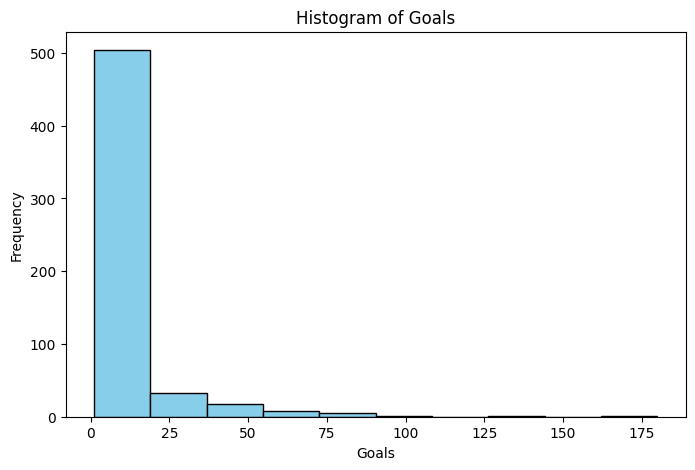

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️ Histogram: Goals vs Frequency
plt.figure(figsize=(8,5))
plt.hist(df['Goals'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.show()

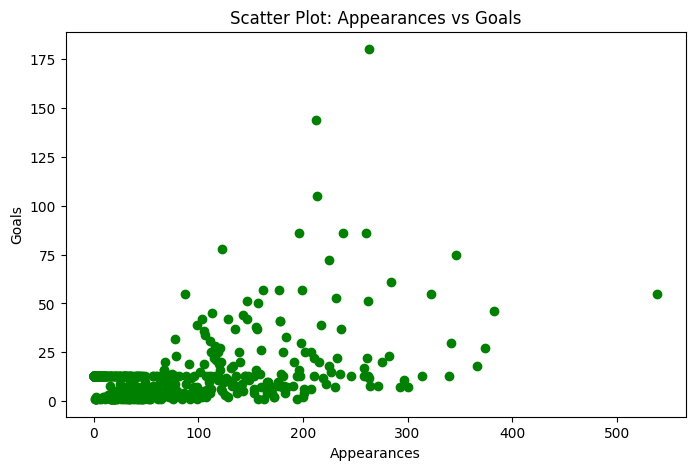

In [17]:
# 2️ Scatter: Appearances vs Goals
plt.figure(figsize=(8,5))
plt.scatter(df['Appearances'], df['Goals'], color='green')
plt.title('Scatter Plot: Appearances vs Goals')
plt.xlabel('Appearances')
plt.ylabel('Goals')
plt.show()

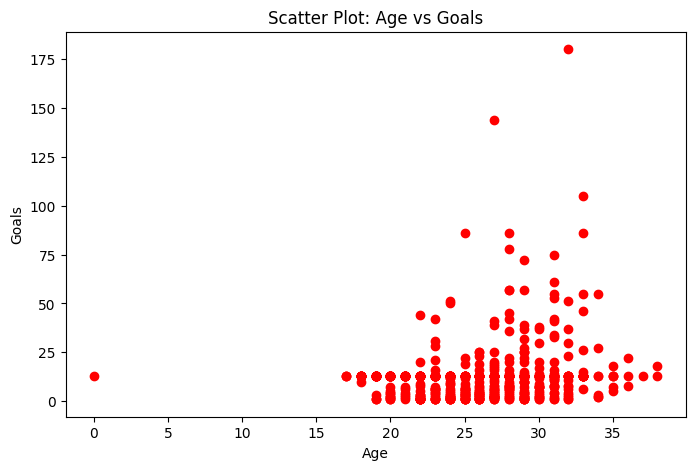

In [18]:

# 3️ Scatter: Age vs Goals
plt.figure(figsize=(8,5))
plt.scatter(df['Age'], df['Goals'], color='red')
plt.title('Scatter Plot: Age vs Goals')
plt.xlabel('Age')
plt.ylabel('Goals')
plt.show()

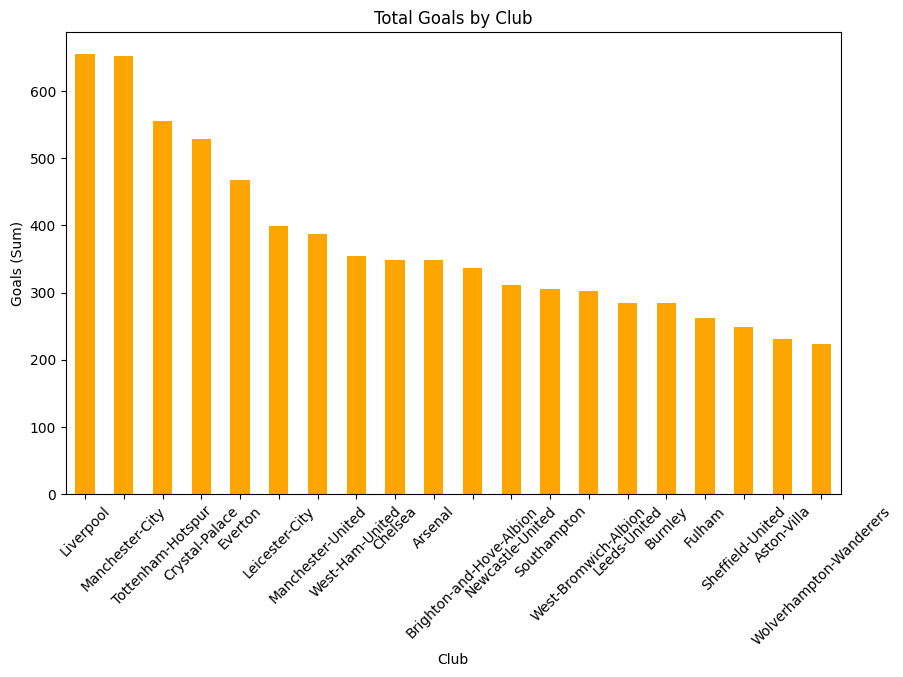

In [19]:

# 4️ Bar Chart: Club vs Total Goals
club_goals = df.groupby('Club')['Goals'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
club_goals.plot(kind='bar', color='orange')
plt.title('Total Goals by Club')
plt.xlabel('Club')
plt.ylabel('Goals (Sum)')
plt.xticks(rotation=45)
plt.show()

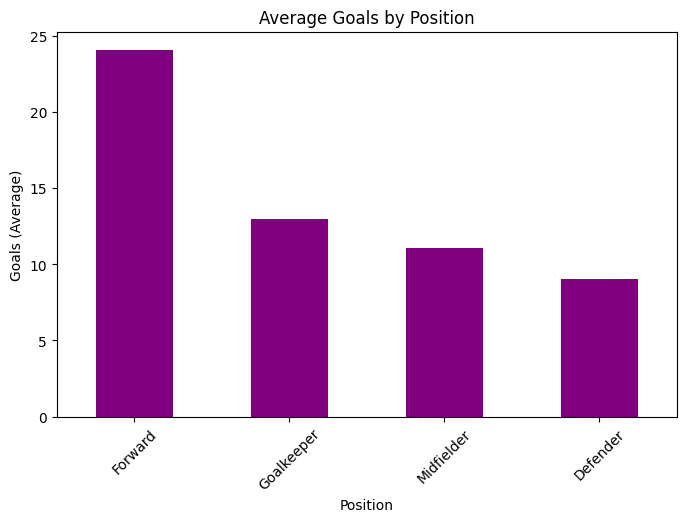

In [21]:

# 5️ Bar Chart: Position vs Average Goals
position_goals = df.groupby('Position')['Goals'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
position_goals.plot(kind='bar', color='purple')
plt.title('Average Goals by Position')
plt.xlabel('Position')
plt.ylabel('Goals (Average)')
plt.xticks(rotation=45)
plt.show()

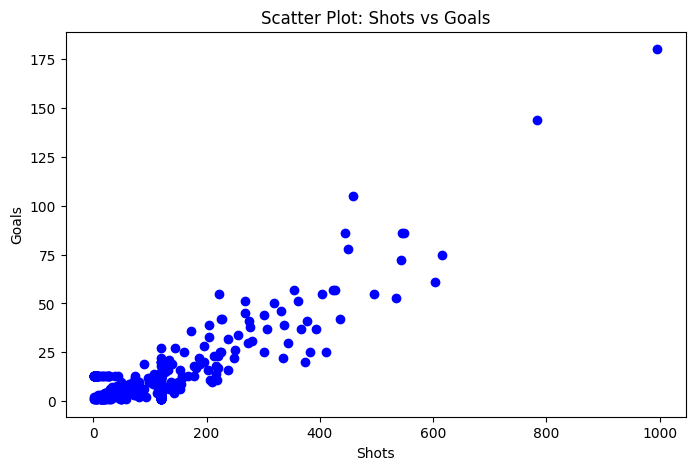

In [22]:

# 6️ Scatter: Shots vs Goals
plt.figure(figsize=(8,5))
plt.scatter(df['Shots'], df['Goals'], color='blue')
plt.title('Scatter Plot: Shots vs Goals')
plt.xlabel('Shots')
plt.ylabel('Goals')
plt.show()

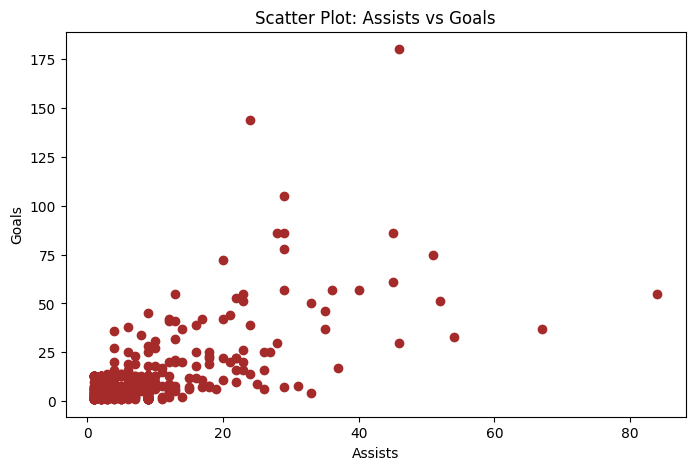

In [23]:
# 7️ Scatter: Assists vs Goals
plt.figure(figsize=(8,5))
plt.scatter(df['Assists'], df['Goals'], color='brown')
plt.title('Scatter Plot: Assists vs Goals')
plt.xlabel('Assists')
plt.ylabel('Goals')
plt.show()

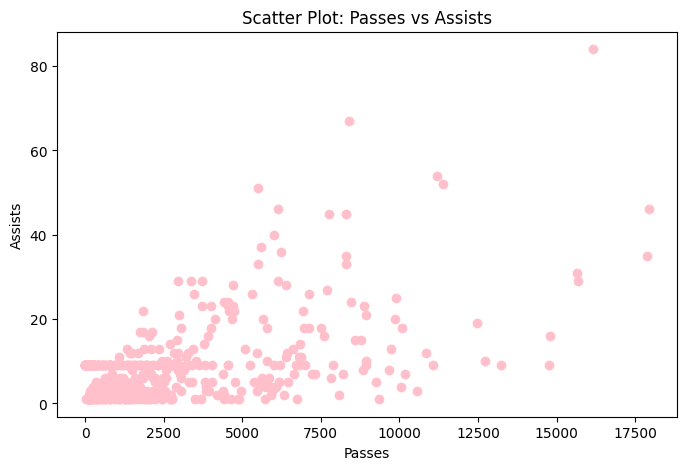

In [24]:
# 8️ Scatter: Passes vs Assists
plt.figure(figsize=(8,5))
plt.scatter(df['Passes'], df['Assists'], color='pink')
plt.title('Scatter Plot: Passes vs Assists')
plt.xlabel('Passes')
plt.ylabel('Assists')
plt.show()


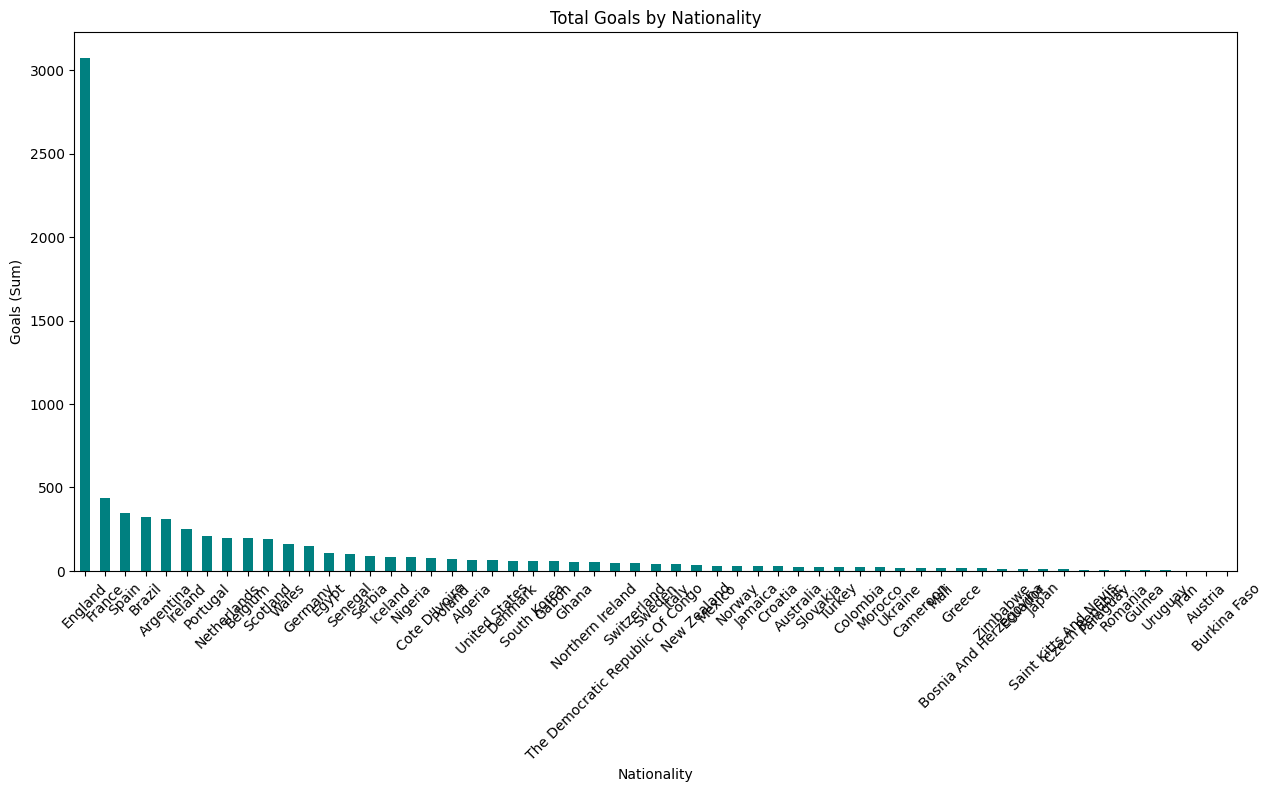

In [25]:

#  Bar Chart: Nationality vs Total Goals
nationality_goals = df.groupby('Nationality')['Goals'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,7))
nationality_goals.plot(kind='bar', color='teal')
plt.title('Total Goals by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Goals (Sum)')
plt.xticks(rotation=45)
plt.show()

H.W-2 : Feature Scaling

Raw values of Goals, Appearances, Passes:

   Goals  Appearances  Passes
0     13           64    1783
1     13            0    2747
2     13            0    2747
3      7          160    7125
4      1           16     519 

Min-Max Scaled values (first 5 rows):

      Goals  Appearances    Passes   Assists
0  0.067039     0.118738  0.099381  0.096386
1  0.067039     0.000000  0.153143  0.096386
2  0.067039     0.000000  0.153143  0.096386
3  0.033520     0.296846  0.397301  0.204819
4  0.000000     0.029685  0.028889  0.000000 

Standardized values (first 5 rows):

      Goals     Shots    Passes
0 -0.007136 -0.002388 -0.326038
1 -0.007136 -0.002388 -0.000166
2 -0.007136 -0.002388 -0.000166
3 -0.395174 -0.002388  1.479780
4 -0.783212 -0.002388 -0.753323 



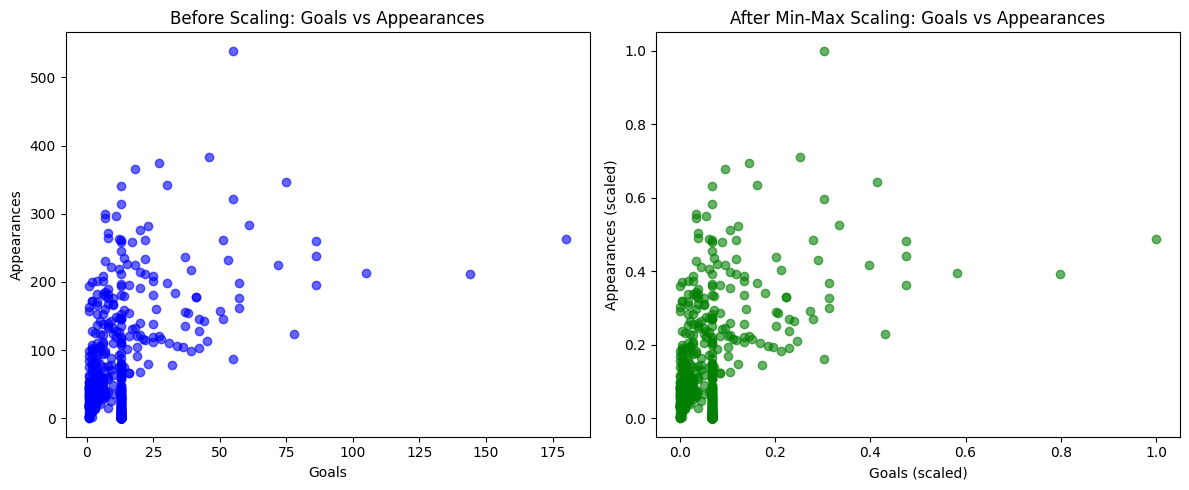

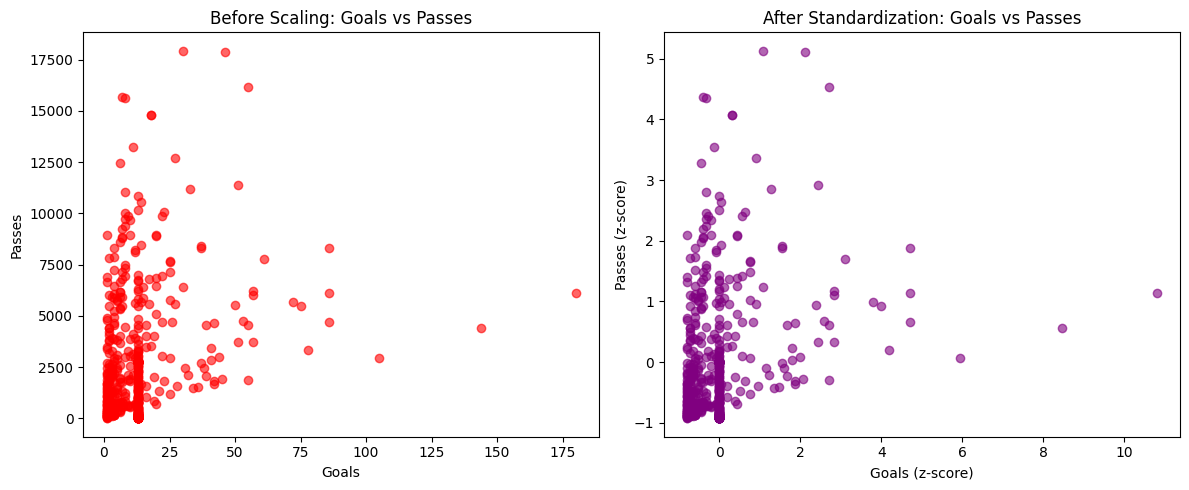

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 1: Print raw values of Goals, Appearances, and Passes
print("Raw values of Goals, Appearances, Passes:\n")
print(df[['Goals', 'Appearances', 'Passes']].head(), "\n")

# Step 2: Apply Min-Max Scaler for Goals, Appearances, Passes, Assists
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[['Goals', 'Appearances', 'Passes', 'Assists']] = minmax_scaler.fit_transform(
    df[['Goals', 'Appearances', 'Passes', 'Assists']]
)

print("Min-Max Scaled values (first 5 rows):\n")
print(df_minmax_scaled[['Goals', 'Appearances', 'Passes', 'Assists']].head(), "\n")

# Step 3: Apply Standardization (Z-score) for Goals, Shots, Passes
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[['Goals', 'Shots', 'Passes']] = standard_scaler.fit_transform(
    df[['Goals', 'Shots', 'Passes']]
)

print("Standardized values (first 5 rows):\n")
print(df_standard_scaled[['Goals', 'Shots', 'Passes']].head(), "\n")

# Step 4: Plot scatter before scaling vs after scaling

# Scatter before scaling: Goals vs Appearances
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(df['Goals'], df['Appearances'], color='blue', alpha=0.6)
plt.title('Before Scaling: Goals vs Appearances')
plt.xlabel('Goals')
plt.ylabel('Appearances')

# Scatter after Min-Max scaling: Goals vs Appearances
plt.subplot(1,2,2)
plt.scatter(df_minmax_scaled['Goals'], df_minmax_scaled['Appearances'], color='green', alpha=0.6)
plt.title('After Min-Max Scaling: Goals vs Appearances')
plt.xlabel('Goals (scaled)')
plt.ylabel('Appearances (scaled)')

plt.tight_layout()
plt.show()

# Scatter before scaling: Goals vs Passes
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(df['Goals'], df['Passes'], color='red', alpha=0.6)
plt.title('Before Scaling: Goals vs Passes')
plt.xlabel('Goals')
plt.ylabel('Passes')

# Scatter after Standardization: Goals vs Passes
plt.subplot(1,2,2)
plt.scatter(df_standard_scaled['Goals'], df_standard_scaled['Passes'], color='purple', alpha=0.6)
plt.title('After Standardization: Goals vs Passes')
plt.xlabel('Goals (z-score)')
plt.ylabel('Passes (z-score)')

plt.tight_layout()
plt.show()

HOMEWORK 3

1:Train–Test Split

In [27]:
from sklearn.model_selection import train_test_split

# Feature selection
feature_cols = [
    'Appearances', 'Shots', 'Passes', 'Assists', 'Minutes'
]

feature_cols = [col for col in feature_cols if col in df.columns]

# Select features and target
X = df[feature_cols]
y = df['Goals']

#  Handle NaN values after feature selection
X = X.fillna(X.mean())
y = y.fillna(y.mean())


# 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape :", X_test.shape)

Training set shape: (428, 4)
Testing set shape : (143, 4)


2:Baseline Regression Model — Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)



#Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance")
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

Linear Regression Performance
MSE : 46.19158906324285
RMSE: 6.796439440121779
R²  : 0.5432548513071478


2:Baseline Classification Model — Logistic Regression

In [34]:
print(df['Goals'].value_counts())
print(df['Match_Outcome'].value_counts())
print(df['Outcome_encoded'].value_counts())


Goals
13     259
1       56
2       38
3       25
4       23
6       19
7       14
8       14
5       14
10       9
12       7
20       6
25       6
9        6
16       5
11       4
22       4
14       4
37       3
55       3
18       3
86       3
42       3
19       3
57       3
27       2
39       2
30       2
23       2
41       2
17       2
15       2
51       2
33       1
36       1
38       1
31       1
72       1
21       1
105      1
75       1
28       1
61       1
78       1
180      1
44       1
53       1
45       1
50       1
144      1
34       1
26       1
46       1
32       1
Name: count, dtype: int64
Match_Outcome
Win    571
Name: count, dtype: int64
Outcome_encoded
0    571
Name: count, dtype: int64
